## 라이브러리 호출

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family = 'Malgun Gothic')

In [2]:
df = pd.read_csv('./data/08_Data.csv')
df.head(2)

,DATE,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,...,D2TI17106 5,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11
0,2017-01-23,0.1,34.120371,16.241512,0.007016,0.006515,0.010939,26.249821,35.0,70.398824,...,127.181492,108.038794,146.584835,146.692649,146.402181,146.540817,152.007281,128.020216,127.977392,191.225271
1,2017-01-23,0.4,35.555397,17.488486,0.006235,0.006704,0.011216,26.249998,35.0,73.097358,...,125.351569,107.532383,146.761584,147.266826,146.865518,146.908826,151.954929,128.062277,128.041426,190.769580


# 지도학습
- 공정의 주요 인자를 X로 넣었을 때, 품질의 상태를 따지는 Y를 ('Target')을 예측하는 Model을 생성

In [3]:
df.isnull().sum()

DATE             0
Target           8
Etching1         0
Etching2         0
Etching3         0
                ..
D2TI17109 15     0
D2TI18038 13     0
D2TIC13007 7     0
D2TIC13007 8     0
D2TIC13111 11    0
Length: 67, dtype: int64

In [4]:
df1 = df.dropna()

In [5]:
# 1) 학습에 있어 X, Y 선언
X = df1[['CVD1','CVD2','CVD3','Etching1','Etching2','Etching3']]
Y = df1['Target']

# X는 DF
# Y는 Series

In [6]:
# 지도학습에 사용될 라이브러리 호출
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# from sklearn.metrics import 

In [7]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# 학습 수행
model = DecisionTreeRegressor(random_state = 7)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=7)

In [8]:
# 평가
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('학습 능력 평가 :', r2_score(y_train, y_train_pred))
print('일반화 능력 평가 :', r2_score(y_test, y_test_pred))

학습 능력 평가 : 1.0
일반화 능력 평가 : -0.7402157241106335


In [9]:
# 새로운 데이터로 예측
x1 = input('CVD1값을 입력하시오 :')
x2 = input('CVD2값을 입력하시오 :')
x3 = input('CVD3값을 입력하시오 :')
x4 = input('Etching1값을 입력하시오 :')
x5 = input('Etching2값을 입력하시오 :')
x6 = input('Etching3값을 입력하시오 :')

new_data = pd.DataFrame(data=[[x1,x2,x3,x4,x5,x6]], columns = X.columns)
new_data

CVD1값을 입력하시오 :10
CVD2값을 입력하시오 :20
CVD3값을 입력하시오 :300
Etching1값을 입력하시오 :300
Etching2값을 입력하시오 :20
Etching3값을 입력하시오 :10


,CVD1,CVD2,CVD3,Etching1,Etching2,Etching3
0,10,20,300,300,20,10


In [10]:
# 입력 값에 대한 값 예측
model.predict(new_data)[0]

1.0

In [11]:
# 생성한 모델을 파일 형태로 저장
import pickle

pickle.dump(model, open('./실습 저장파일/model.sav', 'wb')) # 앞서 만든 mocel 변수를 파일로 생성

# 분류 모델

In [12]:
# 01_Data.csv
df2 = pd.read_csv('./data/01_Data.csv')
df2.head(1)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고


In [13]:
# 1) 데이터 핸들링
df2['State'].unique()

array(['계약확정', '기간만료', '해약확정', '해약진행중'], dtype=object)

In [14]:
df2['해약여부'] = df2['State'].replace({'계약확정' : '정상', '기간만료' : '해약', '해약확정' : '해약', '해약진행중' : '해약'})
df2['해약여부'].value_counts()

정상    50620
해약      681
Name: 해약여부, dtype: int64

In [15]:
# 결측치 제거
df3 = df2.dropna()

In [16]:
# 2) 목표변수 / 설명변수 설정
X = df3[['Age','Credit_Rank','Amount_Month', 'Term']]
Y = df3['해약여부']

In [17]:
# 3) 데이터 분한
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# 4) model fit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [19]:
print('Train 능력 평가 :', accuracy_score(y_train, y_train_pred))
print('Test 능력 평가 :', accuracy_score(y_test, y_test_pred))

Train 능력 평가 : 0.9887881344017995
Test 능력 평가 : 0.9831078310783108


In [20]:
# Test 셋에 대한
print('f1 :', f1_score(y_test,y_test_pred, pos_label='정상'))
print('precision(정밀도) :', precision_score(y_test,y_test_pred, pos_label='정상'))
print('recall(재현율) :', recall_score(y_test,y_test_pred, pos_label='정상'))
print('')
print('오차행렬 :')
print(confusion_matrix(y_test,y_test_pred))

f1 : 0.9914777428429588
precision(정밀도) : 0.9852820259825686
recall(재현율) : 0.997751873438801

오차행렬 :
[[11983    27]
 [  179     6]]


In [21]:
cm = confusion_matrix(y_test,y_test_pred)
print(cm)
precision = cm[0][0] / (cm[0][0] + cm[1][0]) # TN + FP

[[11983    27]
 [  179     6]]


In [22]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          정상       0.99      1.00      0.99     28094
          해약       0.88      0.13      0.22       358

    accuracy                           0.99     28452
   macro avg       0.94      0.56      0.61     28452
weighted avg       0.99      0.99      0.98     28452

              precision    recall  f1-score   support

          정상       0.99      1.00      0.99     12010
          해약       0.18      0.03      0.06       185

    accuracy                           0.98     12195
   macro avg       0.58      0.52      0.52     12195
weighted avg       0.97      0.98      0.98     12195



In [23]:
report = classification_report(y_test, y_test_pred, output_dict=True)
res = pd.DataFrame(report).T
res

,precision,recall,f1-score,support
정상,0.985282,0.997752,0.991478,12010.000000
해약,0.181818,0.032432,0.055046,185.000000
accuracy,0.983108,0.983108,0.983108,0.983108
macro avg,0.583550,0.515092,0.523262,12195.000000
weighted avg,0.973093,0.983108,0.977272,12195.000000


# Mission 7.
- '01_Data.csv'파일을 가져와 df1로 선언한 뒤, 아래의 문제를 해결하시오

In [24]:
# 1. 'Amount_Month'(월랜탈비용)과 'Term'(계약기간)데이터를 곱하여
# 계약기간동안 한명의 고객이 총 납부하는 'Total_Amount'(총 금액) 파생변수 생성
df1 = pd.read_csv('./data/01_Data.csv', index_col = 0)
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
df1[['Total_Amount']]

,Total_Amount
Index,
1,5814000
2,6174000
3,5814000
4,802800
5,802800
...,...
51298,5814000
51299,5814000
51300,4715100


In [25]:
# 2. Total_Amount(총금액) 값에 따라 고객의 등급을 분류하고자 한다.
# '총금액'이 상위 10% 고객은 VIP
# 상위 30% 고객은 Special
# 나머지 고객은 Normal로 계산하여 '고객등급'이라는 파생변수 생성
df1['고객등급'] = 'Normal'
df1.loc[df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.70), '고객등급'] = 'Special'
df1.loc[df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.90), '고객등급'] = 'VIP'
df1['고객등급'].value_counts()

Special    21145
Normal     20909
VIP         9247
Name: 고객등급, dtype: int64

In [26]:
# 3. 앞서 계산된 '고객등급' 데이터에서 'VIP'등급의 고객 특성을 확인하고자 한다.
# 'VIP'고객만 따로 추출하여, 'Channel'(유입경로)에 따른 '총금액'(Total_Amount) 값의 평균을 계산하고
# 층별화 시각화하여라.
pivot_q3 = df1.loc[df1['고객등급'] == 'VIP'].pivot_table(index='Channel', values = 'Total_Amount', aggfunc = 'mean').reset_index()
display(pivot_q3)

,Channel,Total_Amount
0,대형마트A,6.657713e+06
1,대형마트C,6.534000e+06
2,대형마트E,6.697143e+06
3,대형마트H,6.498000e+06
4,영업방판,6.731221e+06
5,자체홈페이지,6.452250e+06
6,재계약,6.354000e+06
7,전단홍보,6.794096e+06
8,전문매장H,6.638545e+06
9,전문매장Z,6.602187e+06


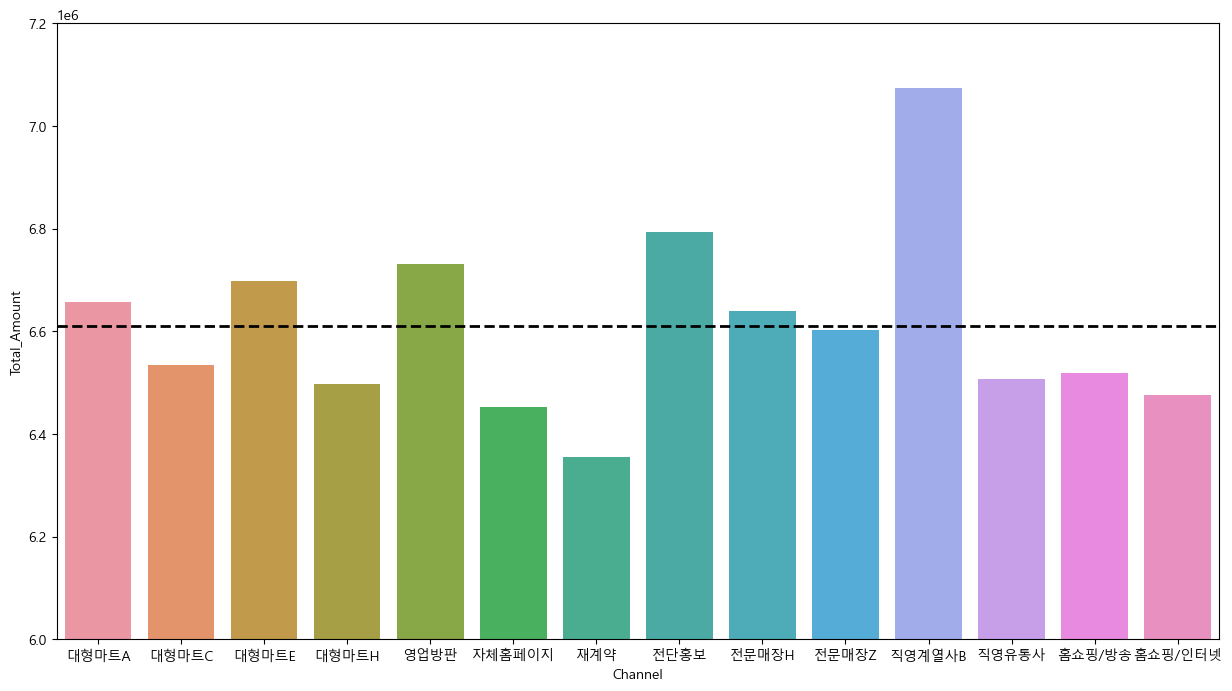

In [47]:
plt.figure(figsize = (15,8))
sns.barplot(data = pivot_q3, x = 'Channel', y = 'Total_Amount')
plt.axhline(pivot_q3['Total_Amount'].mean(), 0, 1, color='black', linestyle='--', linewidth=2) # 평균선 표시
plt.ylim(6000000,7200000)
plt.show()

In [28]:
# 4. 'VIP'고객들의 'Channel'(유입경로)에서 'Total_Amount'(총금액)의 합이 가장 높은 상위 3개의 유입경로를 확인
# 각 경로별 'Total_Amount'값의 평균의 차이가 있는지 검정
# 3집단 / stats.kruskal(), stats.f_oneway()

top_list = df1.loc[df1['고객등급'] == 'VIP'].pivot_table(index = 'Channel',
            values = 'Total_Amount', aggfunc = 'sum').sort_values(by = 'Total_Amount', ascending = False).index[:3]
top_list

Index(['영업방판', '대형마트A', '대형마트E'], dtype='object', name='Channel')

In [29]:
df1_vip = df1.loc[df1['고객등급'] == 'VIP']

# 1) Total_Amount에 대한 정규성 검정
# H0 : Total_Amount의 분포는 정규성을 따른다.
# H1 : Total_Amount의 분포는 정규성을 따르지 않는다.
stats.normaltest(df1_vip['Total_Amount'])
# p-value < 0.05 이므로 H0 기각한다
# 따라서 Total_Amount의 분포는 정규성을 따르지 않는다.

NormaltestResult(statistic=3682.234297413674, pvalue=0.0)

In [30]:
# 2) 정규성을 따르지 않고 세 집단에 대한 평균검정
# >>>> stats.kruskal()
# H0 : 세 집단의 평균은 모두 같다.
# H1 : 세 집단 중 적어도 한 집단의 평균은 다르다.
df1_vip_영업방판 = df1_vip.loc[df1_vip['Channel'] == '영업방판']
df1_vip_대형A = df1_vip.loc[df1_vip['Channel'] == '대형마트A']
df1_vip_대형E = df1_vip.loc[df1_vip['Channel'] == '대형마트E']

stats.kruskal(df1_vip_영업방판['Total_Amount'], df1_vip_대형A['Total_Amount'], df1_vip_대형E['Total_Amount'])
# p-value < 0.05 이므로 H0 기각
# 따라서 세 집단 중 적어도 한 집단의 평균은 다르다고 볼 수 있다.
print('영업방판 평균 :',df1_vip_영업방판['Total_Amount'].mean())
print('대형마트A 평균 :',df1_vip_대형A['Total_Amount'].mean())
print('대형마트E 평균 :',df1_vip_대형E['Total_Amount'].mean())

영업방판 평균 : 6731221.191135734
대형마트A 평균 : 6657712.537612839
대형마트E 평균 : 6697142.980561555


In [31]:
# 5. 고객등급에 따라 사용하는 제품군을 확인(Product_Type)
# '고객등급'과 '제품군'의 빈도수를 Table형태로 계산
# Contingecy Table -> crosstab(교차분석)
cross_q5 = pd.crosstab(df1['고객등급'],df1['Product_Type'])
cross_q5

Product_Type,DES-1,DES-2,DES-3A,DES-R4,ERA,MMC
고객등급,,,,,,
Normal,10414,8478,1366,7,644,0
Special,20137,377,631,0,0,0
VIP,8582,141,84,320,0,120


In [32]:
# 6. '고객등급'과 '제품군'의 연관성이 있는지 가설검정 수행
# 1) 연관성 검정 -> 카이제곱 검정
# H0 : 두 범주형 데이터는 서로 독립이다.(연관성이 없다.)
# H1 : 두 범주형 데이터는 서로 독립이 아니다.(연관성이 있다.)

print('p_value 값 :',stats.chi2_contingency(cross_q5)[1])
stats.chi2_contingency(cross_q5)
# p-value < 0.05 이므로 H0 기각한다
# 따라서 두 데이터는 서로 독립이 아니라고 볼 수 있다.

p_value 값 : 0.0


(17400.408970458084,
 0.0,
 10,
 array([[15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813],
        [16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772]]))

In [33]:
# 7. '연체건수'(Overdue_count)를 예측하는 모델을 구성하고자 한다. 아래의 조건에 맞게 Model 생성
# 1. X : 'Age', 'Term','Amount_Month'
# 2. Y : 'Overdue_count'
# 3. Train : Test = 8 : 2
# 4. DecisionTreeRegressor 알고리즘
# 5. 평가 : 학습데이터의 R2와 테스트 데이터의 R2를 계산

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

df2 = df1[['Age','Term','Amount_Month','Overdue_count']]
df3 = df2.dropna()

X = df3[['Age','Term','Amount_Month']]
Y = df3['Overdue_count']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
model = DecisionTreeRegressor(random_state = 7)
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train 셋 평가 :', r2_score(y_train,y_train_pred))
print('Test 셋 평가 :', r2_score(y_test,y_test_pred))

Train 셋 평가 : 0.16934003058327007
Test 셋 평가 : -0.07900686738767915


In [34]:
# 8. Product_Type별 계약건수(row) 대비 Total_Amount 값을 계산하시오
# 각 제품 군 별 계약금액 합 / 계약 건수

df1_q8 = df1.pivot_table(index = 'Product_Type',values = 'Total_Amount', aggfunc = ['sum', 'count']).reset_index()
df1_q8

,Product_Type,sum,count
,,Total_Amount,Total_Amount
0,DES-1,209786169096,39133
1,DES-2,44744720760,8996
2,DES-3A,11745786960,2081
3,DES-R4,2514207600,327
4,ERA,3007508400,644
5,MMC,886626000,120


In [35]:
df1_q8['sum_div_count'] = (df1_q8['sum'] / df1_q8['count'])
df1_q8

,Product_Type,sum,count,sum_div_count
,,Total_Amount,Total_Amount,
0,DES-1,209786169096,39133,5.360851e+06
1,DES-2,44744720760,8996,4.973846e+06
2,DES-3A,11745786960,2081,5.644299e+06
3,DES-R4,2514207600,327,7.688708e+06
4,ERA,3007508400,644,4.670044e+06
5,MMC,886626000,120,7.388550e+06
